In [1]:
import pandas as pd
import numpy as np
import mlrose
from matplotlib.animation import FuncAnimation
import math
import json
import time
from random import randint
from matplotlib import pyplot as plt
print ('Librerías Cargadas.')
data = pd.read_csv('DataSet/data.csv', header = None, names=["id", "x", "y"])
print('CSV Cargado.')

Librerías Cargadas.
CSV Cargado.


In [2]:
unique_locations = set()
for i in range(0,980):
    unique_locations.add((data['x'][i],data['y'][i]))
print("El Conjunto tiene: "+str(len(unique_locations))+" lugares distintos")

El Conjunto tiene: 634 lugares distintos


In [3]:
matrix = list(unique_locations) 

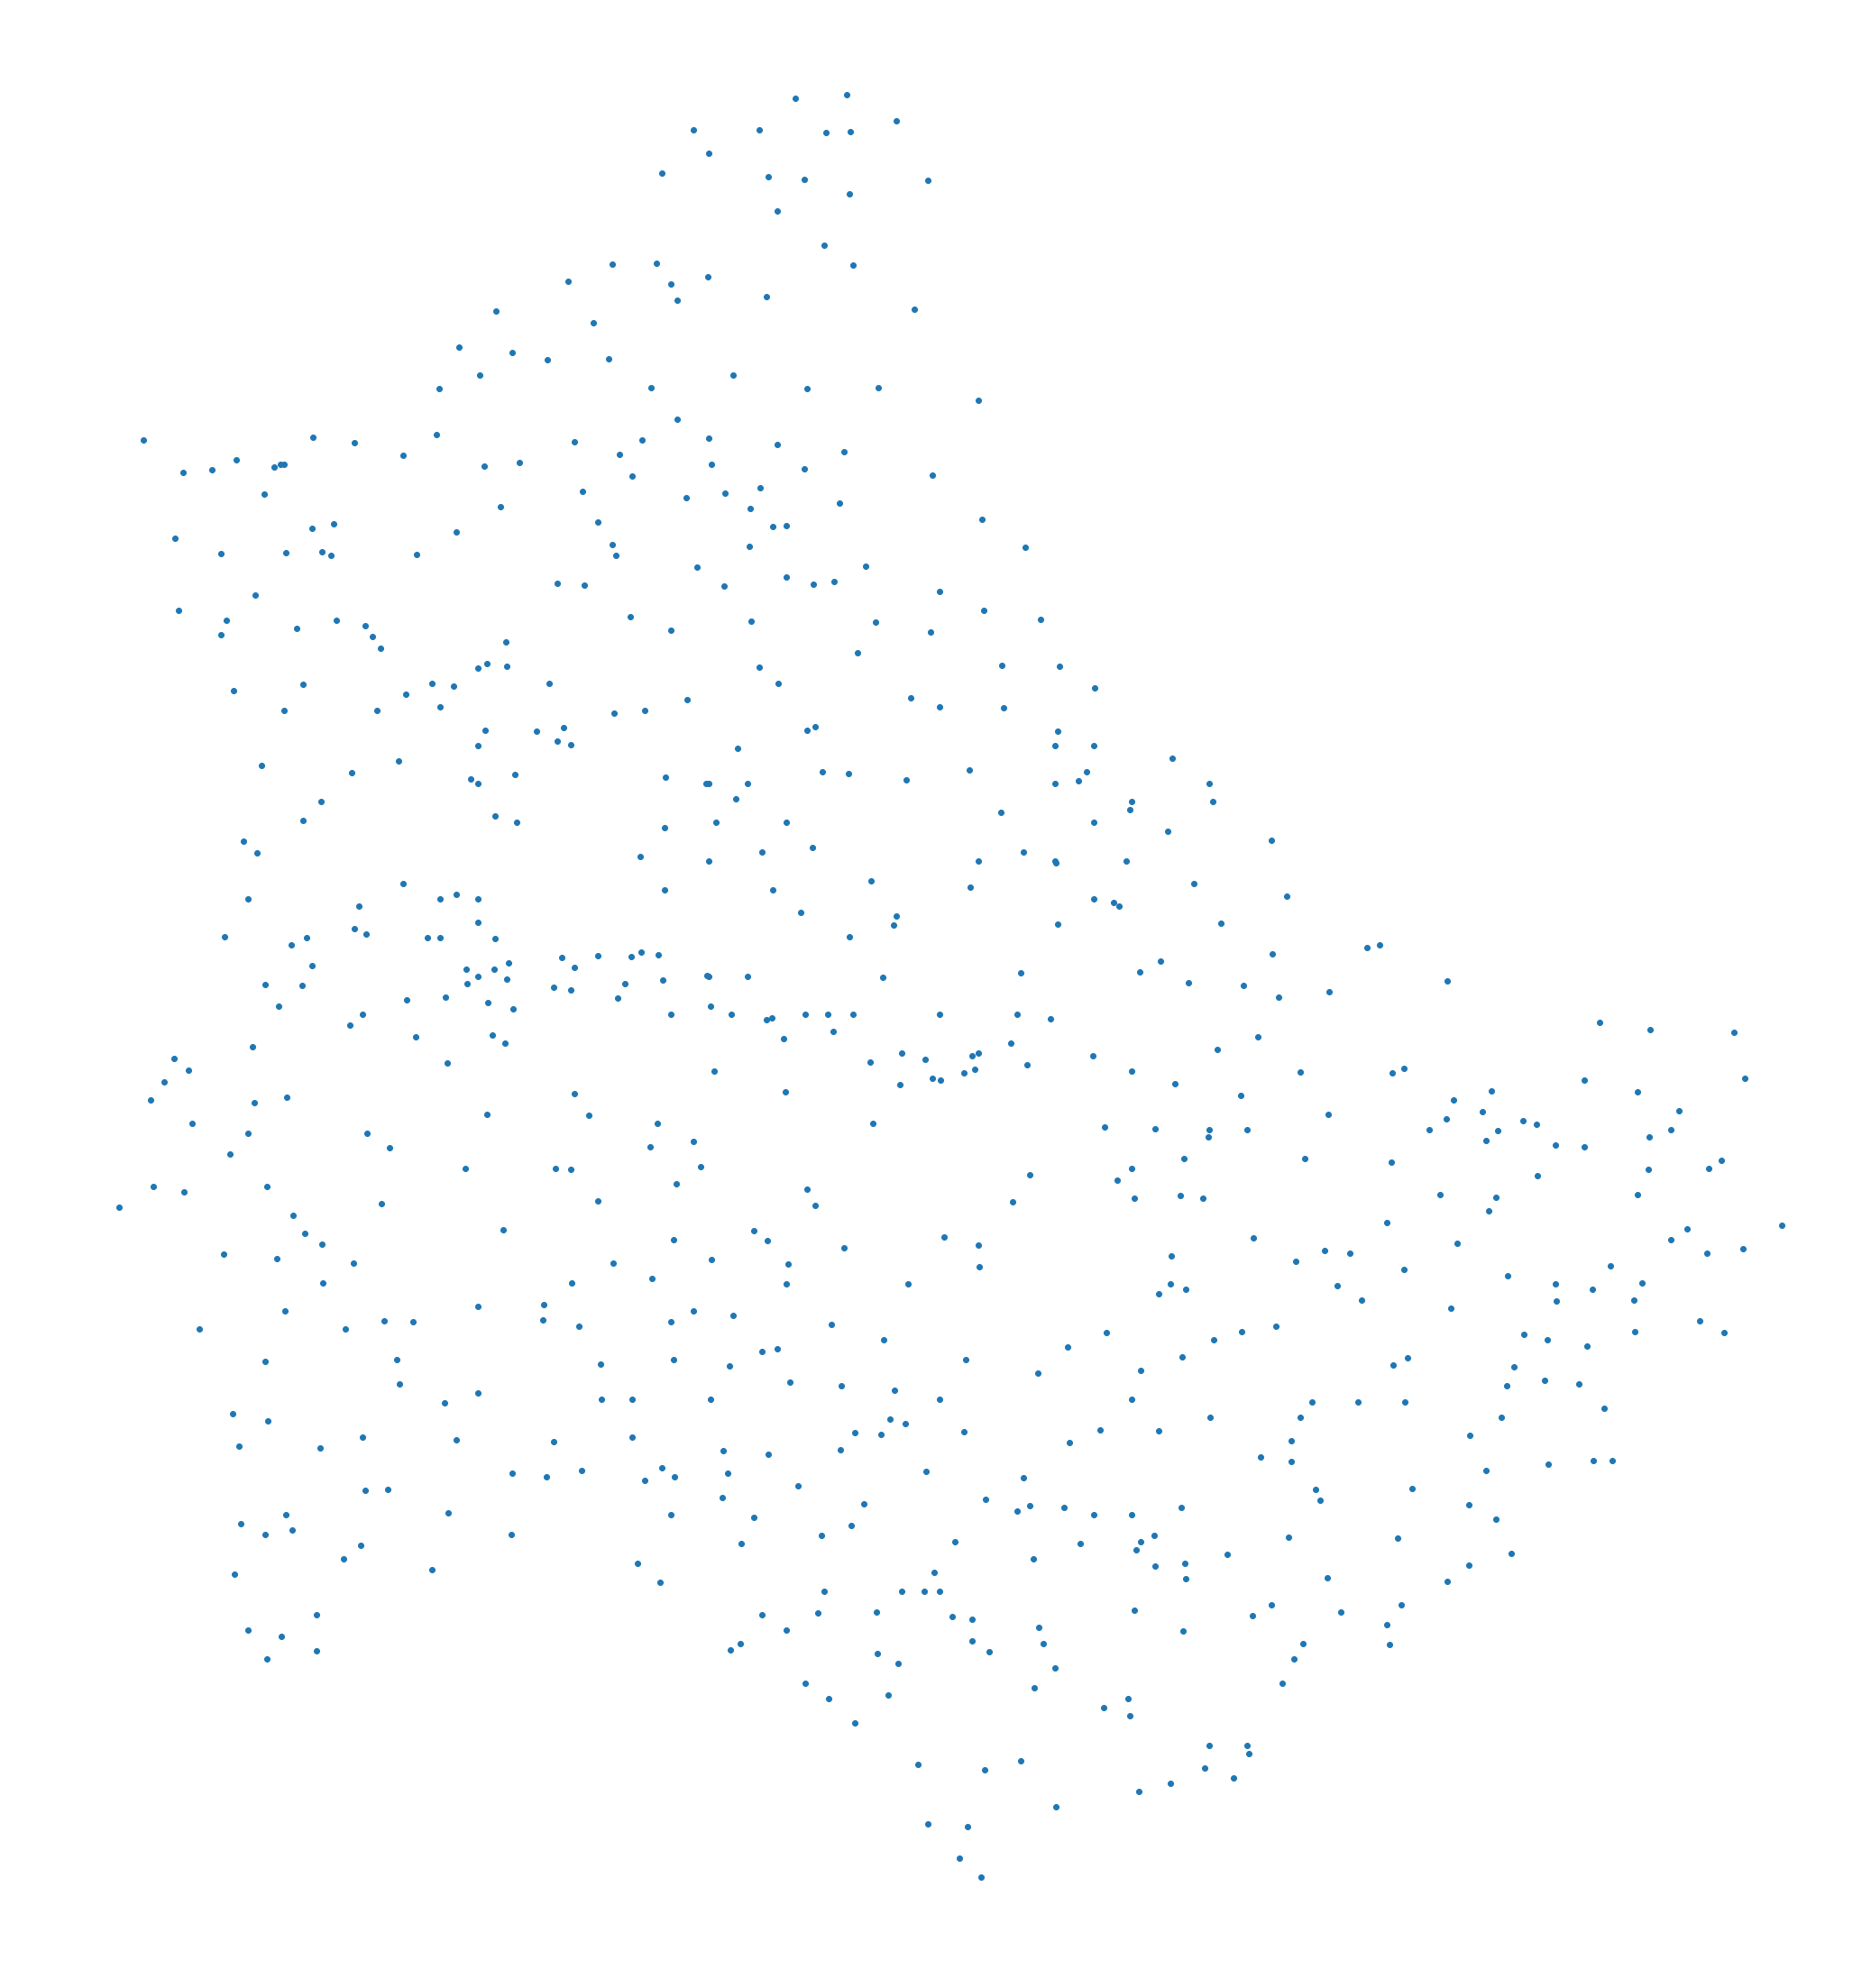

In [4]:
plt.figure(figsize=(40,40));
plt.plot([p[0] for p in matrix], [p[1] for p in matrix], 'o');
plt.axis('scaled');
plt.axis("off");
plt.show();

Mapa de Luxemburgo con las 634 Ubicaciones
![](Images/lux980.png)

In [39]:
fitness_coords = mlrose.TravellingSales(coords = matrix)

In [40]:
problem_fit = mlrose.TSPOpt(length = 634, fitness_fn = fitness_coords,maximize=False)

In [11]:
schedule = mlrose.ExpDecay()
arr = []
for max_iters in range(1000,20000,2000):
    for max_attempts in range(50,500,50):
        random = randint(0,1e6)
        start_time = time.time()
        best_state, best_fitness =  mlrose.simulated_annealing(problem_fit, schedule = schedule, max_attempts=max_attempts, max_iters=max_iters, random_state=random)
        elapsed_time = time.time() - start_time
        data = {"algorithm":"simulated_annealing","max_attempts": max_attempts, "max_iters":max_iters, "best_fitness":best_fitness, "best_route":best_state, "time": elapsed_time, "randomize": random}
        print("Best Fitness:"+str(best_fitness)+", time: "+str(elapsed_time))
        arr.append(data)

/home/nexudev/.local/lib/python3.6/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Best Fitness:139445.19287257854, time: 7.554456949234009
Best Fitness:139828.80027547653, time: 7.44458794593811
Best Fitness:136331.3984124168, time: 7.314178228378296
Best Fitness:139654.09924951702, time: 7.44690728187561
Best Fitness:137093.32557962826, time: 7.394891738891602
Best Fitness:137749.69056970463, time: 7.417880296707153
Best Fitness:138884.20421469037, time: 7.4654316902160645
Best Fitness:140164.41201608407, time: 7.368479251861572
Best Fitness:136052.63831450138, time: 7.594430923461914
Best Fitness:109078.85401106693, time: 20.555490732192993
Best Fitness:106499.56539212355, time: 20.266963958740234
Best Fitness:108577.65256551813, time: 20.296026945114136
Best Fitness:106259.12465314817, time: 20.253825902938843
Best Fitness:108418.8929383955, time: 20.39191436767578
Best Fitness:108223.70253647096, time: 20.78437042236328
Best Fitness:111901.31393180696, time: 20.551004648208618
Best Fitness:103704.6857835826, time: 20.42961311340332
Best Fitness:107849.5628279236

In [12]:
for i in range(1,10):
    mut_prob = i/10.0;
    for max_at in range(10,100,20):
        random = randint(0,1e6)
        start_time = time.time()
        best_state, best_fitness = mlrose.genetic_alg(problem_fit, random_state = random, mutation_prob = mut_prob, max_attempts = max_at)
        elapsed_time = time.time() - start_time
        data = {"algorithm":"genetic_alg","mutation_rate": mut_prob, "max_attempts":max_at, "best_fitness":best_fitness, "best_route":best_state, "time": elapsed_time, "randomize": random}
        print("Se ha terminado el algoritmo con: p="+str(mut_prob)+", max_attempt="+str(max_at)+" duration (s)="+str(elapsed_time))
        arr.append(data)

Se ha terminado el algoritmo con: p=0.1, max_attempt=10 duration (s)=34.517141580581665
Se ha terminado el algoritmo con: p=0.1, max_attempt=30 duration (s)=76.05989456176758
Se ha terminado el algoritmo con: p=0.1, max_attempt=50 duration (s)=105.97127056121826
Se ha terminado el algoritmo con: p=0.1, max_attempt=70 duration (s)=298.03549098968506
Se ha terminado el algoritmo con: p=0.1, max_attempt=90 duration (s)=489.20089530944824
Se ha terminado el algoritmo con: p=0.2, max_attempt=10 duration (s)=41.35205388069153
Se ha terminado el algoritmo con: p=0.2, max_attempt=30 duration (s)=66.3310034275055
Se ha terminado el algoritmo con: p=0.2, max_attempt=50 duration (s)=211.37642788887024
Se ha terminado el algoritmo con: p=0.2, max_attempt=70 duration (s)=257.1219172477722
Se ha terminado el algoritmo con: p=0.2, max_attempt=90 duration (s)=187.82014083862305
Se ha terminado el algoritmo con: p=0.3, max_attempt=10 duration (s)=24.280178785324097
Se ha terminado el algoritmo con: p=0

In [47]:
min_distance = 10000000000
p_index = 0;
j_index = 0;
def select_nearest_point(start_index, matrix, visited_index):
    min_index = 0;
    min_distance = 10000000000
    for i in range(0,len(matrix)):
        if(i not in visited_index):
            p_distance = get_distance(matrix[start_index][0],matrix[start_index][1],matrix[i][0],matrix[i][1])
            if(min_distance > p_distance):
                min_distance = min(p_distance, min_distance)
                min_index = i
    return min_index, min_distance
start_time = time.time()
for p in range(0,len(matrix)):
    visited_index = list()
    visited_index.append(p);
    v_distance = 0;
    flag = 1;
    start_point = p;
    while(len(visited_index) < 634 and flag):
        min_index, new_distance = select_nearest_point(start_point,matrix, visited_index)
        visited_index.append(min_index)
        v_distance += new_distance
        if(v_distance >= min_distance):
            flag = 0
        start_point = min_index
    if(v_distance < min_distance):
        route = visited_index
        min_distance = v_distance
elapsed_time = time.time() - start_time
print('Best_Fitness: '+str(min_distance)+', Elapsed_Time: '+str(elapsed_time))

Best_Fitness: 13093.245161922787, Elapsed_Time: 766.8402669429779


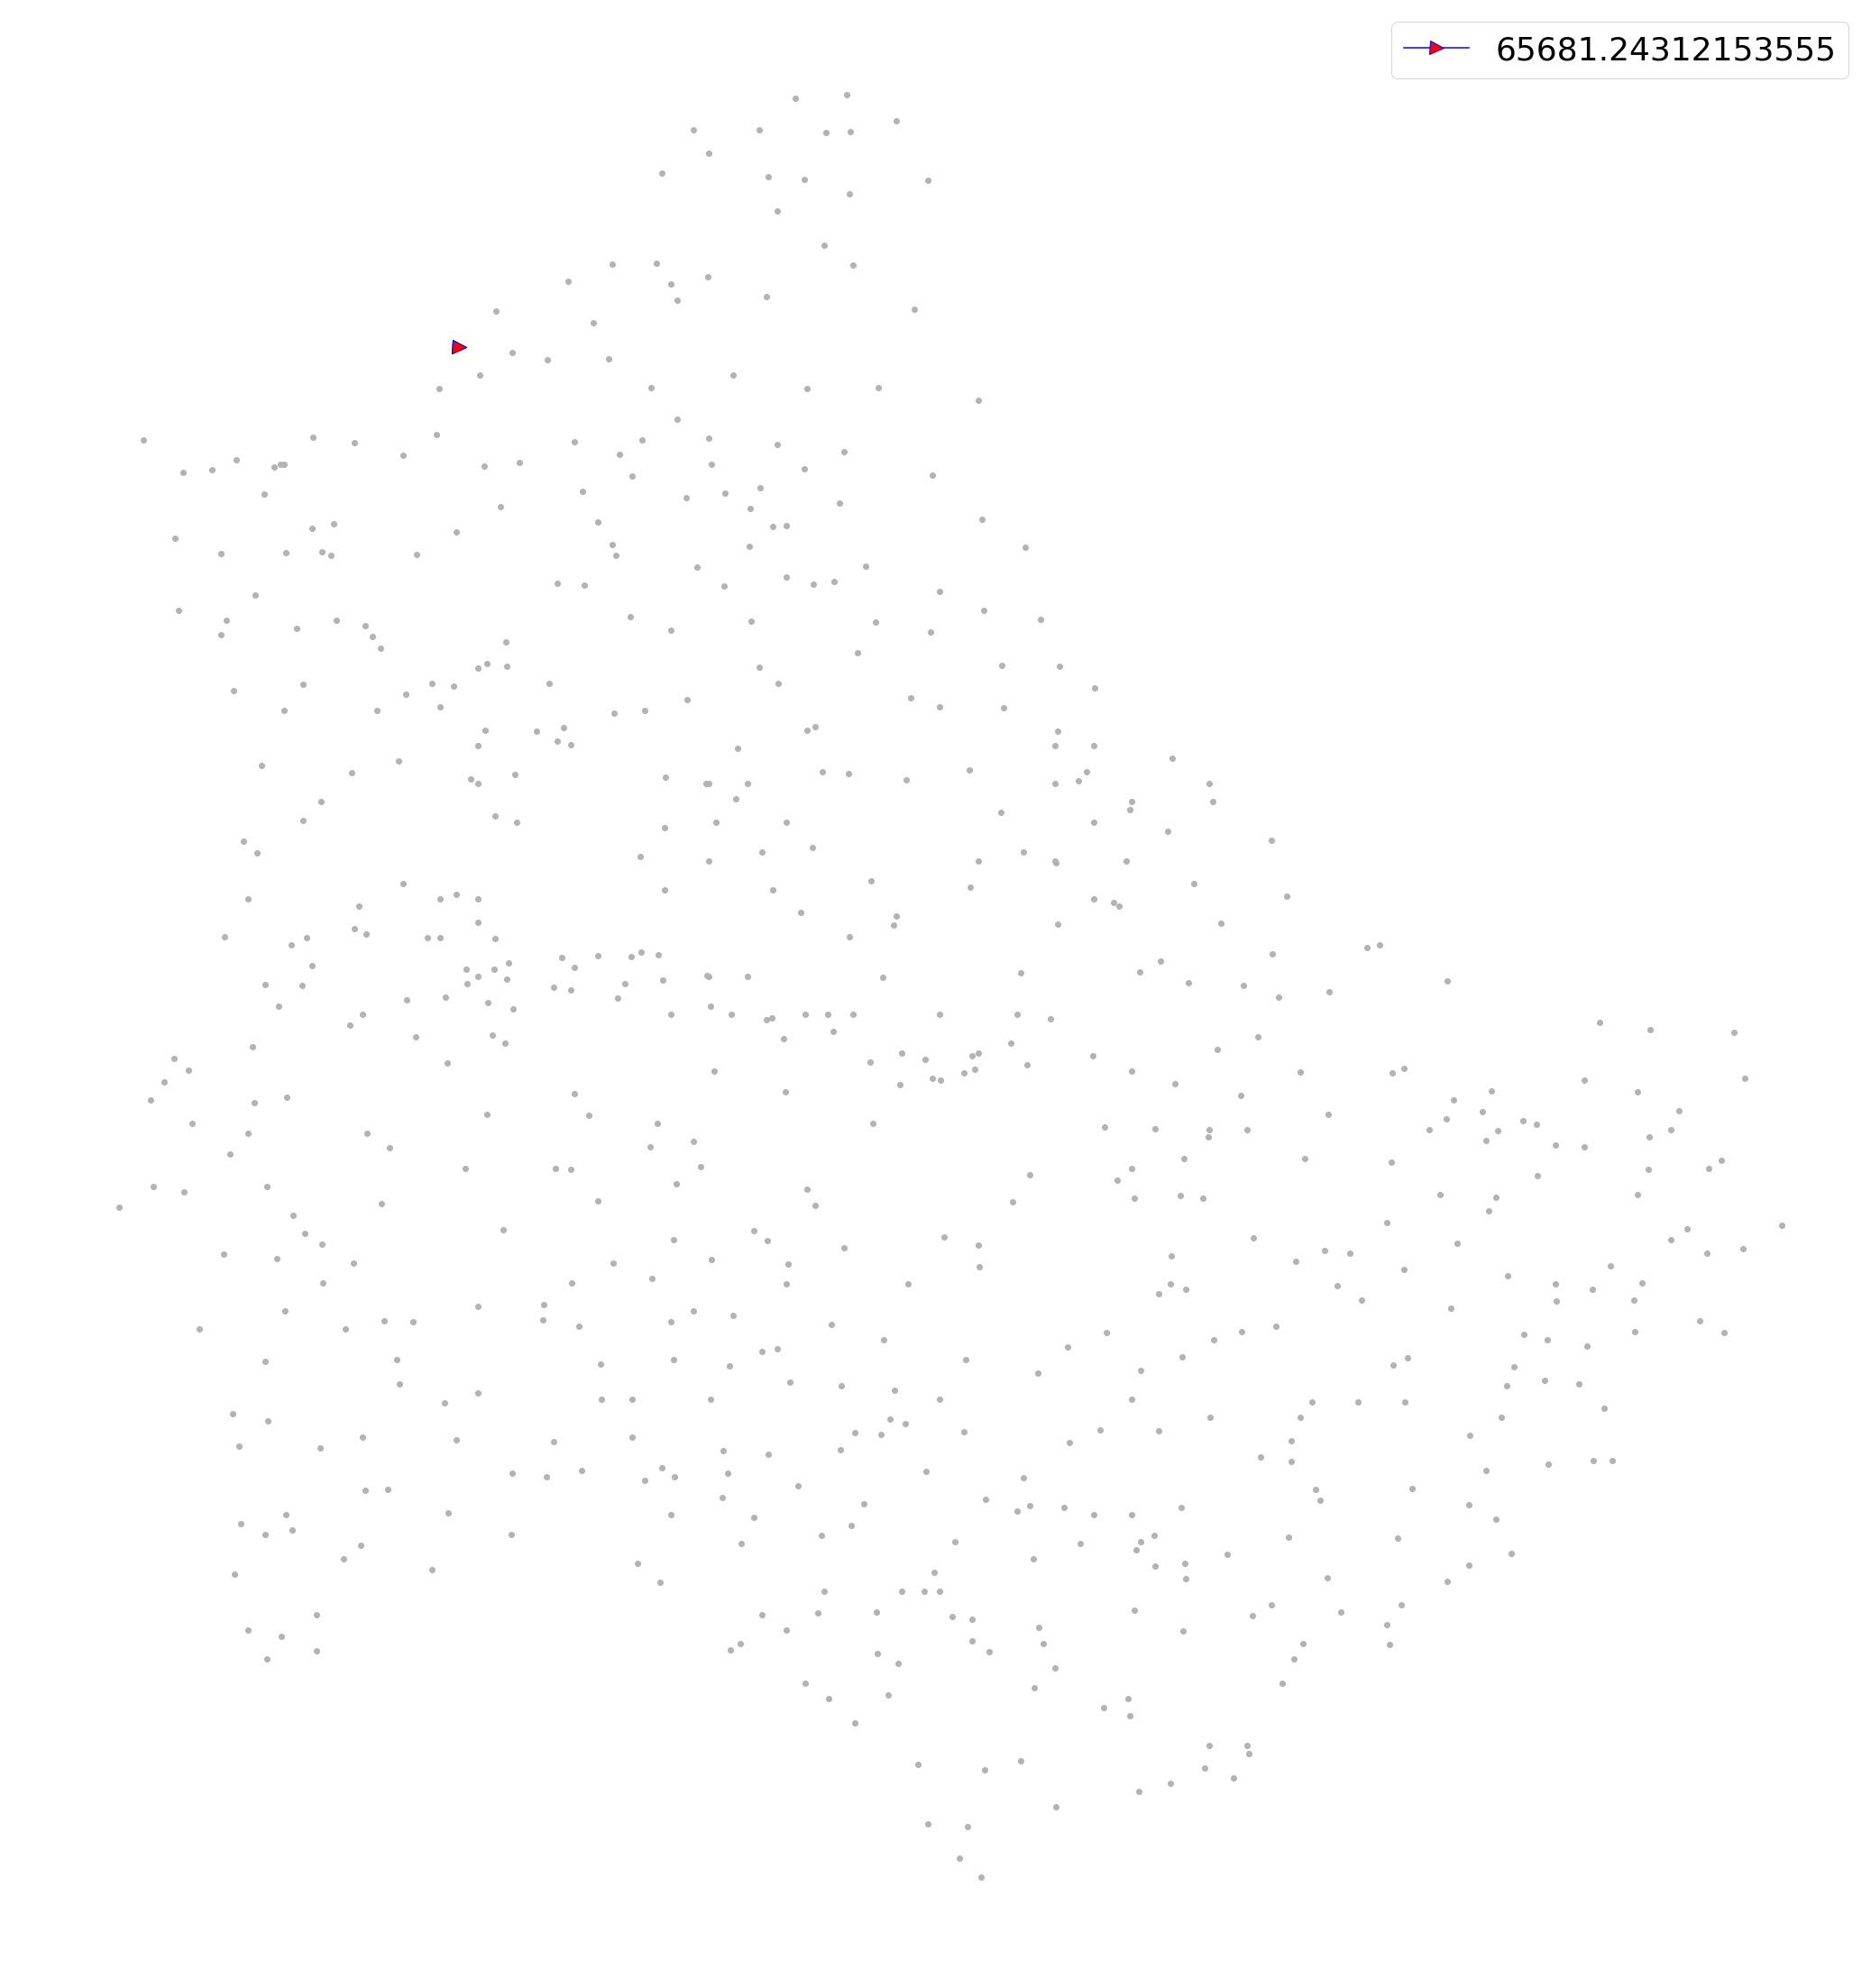

In [6]:
route_nn = [351, 399, 166, 376, 36, 127, 304, 507, 525, 538, 79, 496, 2, 63, 56, 236, 541, 272, 5, 425, 381, 26, 438, 122, 587, 327, 527, 543, 307, 312, 70, 37, 278, 154, 218, 345, 328, 501, 547, 222, 46, 384, 75, 80, 553, 217, 366, 585, 557, 129, 414, 480, 603, 78, 298, 377, 32, 512, 242, 55, 499, 353, 494, 453, 532, 391, 176, 196, 160, 589, 570, 531, 106, 66, 208, 299, 302, 13, 277, 484, 470, 607, 287, 569, 167, 162, 519, 586, 186, 92, 58, 159, 119, 38, 540, 181, 210, 444, 72, 288, 223, 14, 560, 373, 103, 367, 65, 187, 49, 100, 441, 352, 168, 342, 284, 318, 271, 99, 292, 451, 379, 566, 609, 395, 321, 362, 633, 606, 234, 562, 206, 322, 184, 132, 24, 112, 142, 130, 189, 61, 478, 431, 354, 448, 407, 355, 9, 71, 415, 317, 516, 76, 398, 429, 513, 31, 314, 348, 410, 571, 593, 452, 11, 485, 121, 472, 139, 502, 16, 220, 363, 62, 10, 77, 123, 226, 87, 12, 375, 402, 111, 320, 227, 238, 261, 267, 219, 357, 256, 522, 500, 597, 535, 268, 595, 518, 621, 497, 207, 203, 559, 155, 232, 27, 247, 508, 233, 358, 529, 153, 458, 259, 418, 551, 264, 241, 537, 275, 421, 311, 316, 88, 350, 209, 487, 464, 457, 368, 382, 40, 113, 430, 3, 64, 432, 83, 428, 297, 200, 426, 7, 332, 231, 417, 28, 95, 491, 542, 289, 177, 482, 172, 308, 360, 91, 205, 25, 138, 118, 442, 4, 86, 463, 473, 337, 141, 605, 509, 608, 437, 201, 383, 615, 173, 182, 149, 276, 555, 340, 175, 273, 150, 611, 626, 580, 42, 147, 339, 578, 361, 199, 125, 406, 250, 625, 193, 604, 216, 544, 413, 137, 274, 213, 128, 423, 41, 313, 548, 528, 422, 1, 632, 393, 301, 158, 202, 303, 260, 45, 144, 459, 536, 296, 561, 174, 630, 243, 486, 471, 456, 498, 126, 249, 622, 380, 336, 331, 146, 263, 477, 575, 281, 572, 228, 192, 616, 145, 454, 568, 365, 554, 481, 404, 447, 131, 19, 489, 43, 109, 15, 96, 124, 21, 469, 412, 558, 230, 466, 347, 446, 17, 476, 579, 54, 221, 39, 23, 101, 524, 117, 602, 405, 266, 309, 300, 460, 588, 246, 191, 545, 573, 51, 344, 619, 136, 204, 440, 33, 386, 290, 165, 436, 18, 244, 151, 549, 490, 169, 254, 48, 325, 600, 135, 59, 628, 85, 282, 53, 483, 617, 599, 614, 330, 556, 171, 443, 411, 467, 349, 582, 338, 590, 539, 505, 29, 262, 102, 408, 178, 215, 371, 564, 224, 285, 108, 495, 534, 503, 388, 133, 449, 8, 576, 255, 68, 291, 251, 252, 60, 30, 211, 305, 433, 140, 577, 510, 104, 245, 35, 374, 450, 190, 198, 416, 89, 468, 214, 269, 67, 98, 409, 286, 552, 295, 225, 479, 455, 163, 420, 506, 514, 323, 179, 550, 90, 591, 419, 624, 400, 335, 270, 445, 81, 359, 343, 401, 517, 574, 148, 474, 52, 364, 592, 434, 623, 170, 583, 613, 326, 492, 523, 465, 629, 212, 197, 334, 257, 237, 239, 94, 180, 293, 84, 294, 439, 143, 596, 387, 195, 97, 0, 504, 341, 310, 229, 563, 183, 47, 565, 280, 488, 627, 329, 620, 610, 74, 240, 161, 424, 372, 188, 73, 134, 390, 248, 93, 396, 584, 110, 306, 283, 258, 346, 394, 435, 116, 511, 22, 156, 567, 546, 601, 397, 530, 50, 581, 493, 462, 475, 333, 427, 157, 403, 526, 533, 324, 594, 6, 370, 521, 44, 392, 57, 164, 515, 378, 279, 194, 598, 265, 82, 315, 107, 34, 389, 612, 114, 520, 385, 120, 631, 253, 319, 461, 20, 185, 356, 369, 115, 235, 69, 152, 105, 618]
route_sa = [625, 608,   1, 260,  45, 429, 220,  31, 491, 410,  61,  24, 633,
       560,  65, 284, 342, 416, 254, 540, 149, 182, 383, 201, 353,  80,
       141, 391, 585, 137, 524, 554, 109, 213, 242, 499, 541, 142, 425,
       626, 147, 327,  99, 271, 543, 459, 144, 326, 495, 588, 577, 231,
        28,  95, 332, 238,  47, 324, 134, 591,  52, 256, 207, 493, 346,
       511, 515, 618, 349, 155, 564, 212, 252, 170, 359, 372, 445,  81,
       594,  73, 462, 419, 179, 164, 286, 402, 502, 318, 199, 337, 509,
       339,   4, 621, 457, 394, 194, 258, 279, 153, 455, 262, 119, 309,
       624, 248, 323, 239, 257, 343, 304, 482, 121, 289, 451, 292, 187,
       433, 386, 204, 287, 454, 404, 145, 321, 441, 223, 460, 477, 523,
        74, 465, 539,  30, 344,  85,  48,  59, 135, 352, 600, 193, 412,
        43, 579, 604, 406,  25,  26, 132, 206, 562, 606, 567, 306,  50,
       283, 546, 487, 267, 522, 597, 375, 443, 505, 590,  12, 395, 130,
         2, 379,   7,  10,  67, 317, 214, 450, 190, 301, 365, 484, 250,
       473, 166, 355, 288, 208,  68, 290, 617, 431, 516, 542, 496, 322,
       202, 158, 616, 447,  94,   6, 161, 504, 565, 329, 627, 229, 310,
       581, 479, 139,  71, 165, 400, 517, 574,  53, 227, 472, 513, 485,
       348, 571, 268, 247, 171, 458, 508,  72, 437,  41, 423,  66, 345,
       307, 312, 184,  35, 599, 432, 356, 316, 114, 385, 319, 368, 421,
       350, 311, 241, 537, 120, 629, 126, 281, 576, 613, 174, 249, 211,
       246, 545,  60, 408,  46, 218, 501, 328, 196, 176, 547, 611, 407,
       398, 415, 399, 308, 507, 236, 127, 104, 245,  27, 518, 123, 426,
       628, 282,  18, 614, 549, 367, 168,  14, 210,  92,  51, 503, 263,
       186, 570,  13, 527, 129, 366, 568, 300, 243, 622, 630, 108, 335,
       270, 235, 152, 265, 411, 494, 117, 413, 470, 277, 167, 532, 140,
       510, 438,  42, 381, 278, 556, 233, 551, 521, 255, 133, 471, 536,
       136, 364,  98, 448, 376, 478,  89, 444, 222, 274,  32, 605, 272,
        63,  91, 351,  79, 234, 103, 436, 596, 293, 341, 280, 334, 561,
       422, 146, 159, 330, 440,  78,  54, 466, 558, 230, 469, 347, 101,
       580,   5,  70, 586, 632, 414,  39,  23, 405, 192, 572, 481, 217,
       150, 555, 175, 340, 273, 154, 589, 181, 607, 531, 302, 373, 569,
       106, 100,  49, 519, 191, 358, 467, 331, 160,  75, 125, 138, 276,
       118,  86, 122, 162, 303,  58, 619, 456, 102, 592, 105, 370,  57,
       392,  88, 264, 259, 559, 232,  96,  17,  15, 480,  38, 203, 464,
       552, 148,  84, 294,   0, 488, 583,   8, 486, 449, 427,  97, 240,
       534, 575, 557, 446, 128, 377, 266, 528,  55, 587, 205, 468, 198,
       357,  44, 420,  69,  93, 157, 475, 403, 188, 180, 237, 563, 183,
        20, 185, 631,  22, 275, 113, 209, 497, 409, 299, 553, 384, 112,
       538, 189, 566, 609, 338, 225,  90, 506, 156, 533, 424, 195, 439,
       143, 489, 221, 500, 315,  82,  34, 389, 115, 369,  40,  83, 219,
       200, 363, 453, 216, 173, 442, 463, 169, 490, 520, 461, 253, 297,
        62,  77, 428, 535, 529, 378, 110, 584, 418, 314, 417,  16,  76,
       226, 151, 336, 131,  19, 548, 116, 601, 514, 526, 387, 396, 612,
       595, 261, 320, 111, 593, 452, 177, 172,  36,  56, 360, 525, 362,
        37, 393, 313, 124, 476, 228, 197, 620, 610, 390, 333, 397, 107,
       530, 435, 598, 163, 474, 244, 578, 361, 602,  21, 512, 298, 603,
       615, 251, 291, 492, 388, 224, 498, 296, 305,  33, 374, 325, 483,
        11,   9, 354, 269,  87,  64, 430,   3, 382, 295, 623, 285, 215,
        29, 371, 178, 401, 550, 434, 582, 573, 380, 544]
route_ga = [566, 327, 545, 121, 466, 374, 524, 234, 243, 261, 532,  30, 536,
       291, 196, 530, 208, 351,  46, 533, 507, 323, 209, 156,  34, 332,
       472,  33, 537, 404, 205, 461, 520, 595, 567, 117,  12, 242, 583,
       394,  36, 181, 109, 184,  49, 190, 441, 498, 143, 295, 240,  86,
       509, 286, 260, 274, 371, 622, 283, 407, 225, 316, 623, 200, 188,
        53, 451, 611, 605, 618, 581, 450, 193, 495, 500, 123, 277, 282,
       627, 237, 264, 389, 603, 301,  26, 255, 410,  70, 202, 158, 570,
       201, 413,   2,  65, 552,  88, 175, 482, 267,  38, 216, 139, 145,
       182,  16, 213, 189, 630,  22,   6, 183, 120, 222, 485,  39, 458,
       304, 339,  97, 551,  87, 442, 149, 555, 474,  81, 565, 419, 219,
       116, 399,   1, 253,  93,  78, 345,   3, 311, 199, 414, 130, 104,
       528, 539,  50, 325, 574, 115, 356,  28, 125,  11,  20, 350, 296,
       430, 418, 527, 112,  75, 302, 553, 468, 490, 382, 247, 564, 338,
       376, 228, 329, 613, 153, 108, 341, 275, 257, 195, 599, 220, 534,
        45, 518, 320, 579, 560, 186,  74, 578, 322, 601, 146, 388,  68,
       328, 473, 588, 248,  27,  55, 179, 438, 330, 514, 424, 366,  67,
       434, 481, 521, 484, 210, 383, 499, 502,  59, 415, 159, 456, 572,
       542, 214, 293, 544, 535, 235, 426, 515, 562, 217, 263, 128,  19,
         0, 604, 453, 336, 226, 347, 608,  91, 197, 171, 550, 251, 617,
       464,  52, 440, 262,  43, 198, 568, 459,  15,  73, 569, 469,  17,
       161,  72, 308, 422, 266,  40, 529, 177, 134, 127, 289, 278, 409,
       444, 349, 516, 543, 631,  37, 326, 633, 378, 391, 207, 460, 393,
       471,  92, 331, 420, 147, 402, 157,  80, 437, 313,  21, 384, 416,
       408, 204, 486, 164, 180,   7, 455, 272, 368, 575, 346,  51, 230,
       400, 306, 467,  58, 594, 513, 548, 132, 491, 477, 401,  41, 348,
       357,  82, 557, 483, 446, 489, 352,  89,  14, 593, 358, 480, 619,
         4, 268, 380, 395, 429, 381,  98, 318, 279, 335, 411, 106,  63,
       580, 523, 436, 287,  95, 185, 432, 148, 433, 377, 227,   5, 221,
       606, 187, 454, 314, 541, 152, 517, 265, 105, 126, 137,  44, 343,
       101,  54, 612, 531, 584, 602, 512,  25, 549, 614, 354, 554, 629,
       246, 369, 452, 431,  23, 135, 373, 365, 252, 170, 150, 615, 167,
        76, 239, 610, 540, 305, 160, 443, 162, 405, 576,  60,  64,  66,
       494,  62, 556, 573, 621, 428, 144, 589,  18, 462, 585, 625,  96,
       375, 385, 114, 259, 547, 470, 294, 412, 191, 449, 511,  29, 457,
       487, 632, 176,  42, 592, 427, 559, 497, 111,  79, 582,  94, 151,
       154, 609, 307, 142, 233,  85, 258, 508, 598, 256, 232, 250, 360,
       445, 628, 624, 245, 525,  24, 379, 496, 155, 136, 597, 417, 280,
       465, 290, 129, 192, 396,  90, 102, 303, 616, 131, 173, 299, 493,
       141, 423,  35, 447, 118, 478, 492, 236, 386,  99, 212, 133, 577,
       558, 166, 488, 372, 174, 561, 223,  71, 310, 479, 215, 333, 178,
       224, 362, 273, 292,  47,  77, 270, 284, 110, 626, 476, 244, 100,
       504, 390,   9, 398, 254, 363,  69, 298, 397, 403, 355, 334, 392,
       309, 211, 238,   8, 122, 169,  84, 503, 218, 586, 288,  10, 519,
       475, 344, 387,  32, 526, 319,  57, 107, 571, 361, 620, 591, 596,
        61, 249, 113,  13, 276,  56, 406, 285, 600, 315, 538, 300, 448,
       140, 163, 297, 367,  48, 172, 138, 321, 510, 317, 119, 203, 421,
       269, 506, 425, 241, 324, 231, 124,  83, 370, 103, 439, 353, 463,
       340, 364, 229, 607, 342, 206, 563, 590, 337, 501, 271, 587, 312,
       281, 168, 165,  31, 522, 435, 194, 505, 359, 546]
tour = []
for i in range(0, len(route_sa)):
    tour.append((matrix[route_sa[i]][0],matrix[route_sa[i]][1]))
x = np.asarray([p[0] for p in tour])
y = np.asarray([p[1] for p in tour])
fig = plt.figure(figsize=(40,40));
dist = 0
graph, = plt.plot([], [], 'bo-', linewidth=1.5, label=dist, markersize=5)
plt.plot(x,y,'o',color="#b3b3b3",zorder=0)
plt.axis('off')
plt.axis('scaled')
x_init = x[0]
y_init = y[0]
def animate(i):
    global dist 
    global x_init
    global y_init
    dist += get_distance(x_init,y_init, x[i], y[i])
    graph.set_label(dist)
    x_init = x[i]
    y_init = y[i]
    graph.set_data(x[:i+1], y[:i+1])
    graph.set_marker('>')
    graph.set_markersize(15)
    graph.set_markevery(every=[0,i])
    graph.set_markerfacecolor('red')
    plt.legend(prop={'size': 36})
    return graph

def get_distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

ani2 = FuncAnimation(fig, animate, frames=634, interval=100)
ani2.save('best_route_route_sa.mp4',writer='ffmpeg',extra_args=['-loglevel','verbose'])
plt.show()